<a href="https://colab.research.google.com/github/techyorzl/yolov3-from-scratch/blob/master/yolov3Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install torch
import torch
import numpy as np
import pandas as pd
import torch.nn as nn


In [ ]:
#setting the device
devCuda = torch.cuda.is_available()
device = torch.device("cuda" if devCuda else "cpu")

In [ ]:
#downloading the dataset
from google.colab import drive
drive.mount('/content/drive')

# target_path = '/content/drive/MyDrive/VOCdevkit'
# !mkdir -p $target_path
# !wget -P $target_path http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
# !tar -xvf $target_path/VOCtrainval_06-Nov-2007.tar -C $target_path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Lets view a normal XML file to process raw labels
import os

annDir = '/content/drive/MyDrive/VOCdevkit/VOCdevkit/VOC2007/Annotations/'
files = [os.path.join(annDir, xmlFile) for xmlFile in sorted(os.listdir(annDir)) if xmlFile.endswith('.xml')]

sampleFiles = [files[0],files[1], files[2]]

for sampleFile in sampleFiles:
  with open(sampleFile, 'r') as file:
    content = file.read()
    print(content)

<annotation>
	<folder>VOC2007</folder>
	<filename>000005.jpg</filename>
	<source>
		<database>The VOC2007 Database</database>
		<annotation>PASCAL VOC2007</annotation>
		<image>flickr</image>
		<flickrid>325991873</flickrid>
	</source>
	<owner>
		<flickrid>archintent louisville</flickrid>
		<name>?</name>
	</owner>
	<size>
		<width>500</width>
		<height>375</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>chair</name>
		<pose>Rear</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>263</xmin>
			<ymin>211</ymin>
			<xmax>324</xmax>
			<ymax>339</ymax>
		</bndbox>
	</object>
	<object>
		<name>chair</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>165</xmin>
			<ymin>264</ymin>
			<xmax>253</xmax>
			<ymax>372</ymax>
		</bndbox>
	</object>
	<object>
		<name>chair</name>
		<pose>Unspecified</pose>
		<truncated>1</truncated>
		<difficult>1</difficult>
		<bndbox>
			<xmin>

In [ ]:
import cv2
import pathlib
imgDir = '/content/drive/MyDrive/VOCdevkit/VOCdevkit/VOC2007/JPEGImages'

for imgPath in sorted(pathlib.Path(imgDir).glob('*.jpg')):
  img = cv2.imread(str(imgPath))
  resImg = cv2.resize(img, (448, 448))
  cv2.imwrite(str(imgPath), resImg)


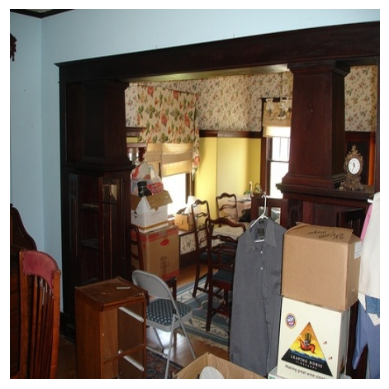

,imgPath,Image Labels,Bounding Box Cordinates,Image Sizes
0,/content/drive/MyDrive/VOCdevkit/VOCdevkit/VOC...,"[chair, chair, chair, chair, chair]","[[263, 211, 324, 339], [165, 264, 253, 372], [...","[500, 375, 3]"
1,/content/drive/MyDrive/VOCdevkit/VOCdevkit/VOC...,[car],"[[141, 50, 500, 330]]","[500, 333, 3]"
2,/content/drive/MyDrive/VOCdevkit/VOCdevkit/VOC...,"[horse, person, person, person]","[[69, 172, 270, 330], [150, 141, 229, 284], [2...","[500, 375, 3]"
3,/content/drive/MyDrive/VOCdevkit/VOCdevkit/VOC...,[car],"[[156, 97, 351, 270]]","[500, 333, 3]"
4,/content/drive/MyDrive/VOCdevkit/VOCdevkit/VOC...,[bicycle],"[[92, 72, 305, 473]]","[334, 500, 3]"


In [ ]:
#That's cool, now we need to store each image's xmin, ymin, xmax, ymax
import xml.etree.ElementTree as ET
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import pathlib

labelsDF = pd.DataFrame()
annDir = '/content/drive/MyDrive/VOCdevkit/VOCdevkit/VOC2007/Annotations/'
imgDir = '/content/drive/MyDrive/VOCdevkit/VOCdevkit/VOC2007/JPEGImages'

# Sample image print
img = cv2.imread('/content/drive/MyDrive/VOCdevkit/VOCdevkit/VOC2007/JPEGImages/000005.jpg')
imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(imgRGB)
plt.axis('off')
plt.show()


imgPaths = sorted(pathlib.Path(imgDir).glob('*'))

df = pd.DataFrame(imgPaths, columns=['imgPath'])

objLabels, bboxCoords, imgSizes = [], [], []

for file in sorted(pathlib.Path(annDir).glob('*')):
    tree = ET.parse(file)
    root = tree.getroot()

    imgSs = [int(root.find('size').find(dims).text) for dims in ['width', 'height', 'depth']]
    objList = [obj.find('name').text for obj in root.findall('object')]
    bboxList = [
        [int(obj.find('bndbox').find(c).text) for c in ['xmin', 'ymin', 'xmax', 'ymax']]
        for obj in root.findall('object')
    ]

    objLabels.append(objList)
    bboxCoords.append(bboxList)
    imgSizes.append(imgSs)

df['Image Labels'] = objLabels
df['Bounding Box Cordinates'] = bboxCoords
df['Image Sizes'] = imgSizes
df.head()
